In [14]:
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [34]:
%autoreload
import pathlib
import matplotlib.pyplot as plt
import pke
import networkx as nx
import pandas as pd

In [35]:
sample_text_path = pathlib.Path('short_sample.txt')
assert sample_text_path.exists()
with open(sample_text_path) as f:
    print(f.read())

Compatibility of systems of linear constraints over the set of natural numbers.
Criteria of compatibility of a system of linear Diophantine equations, strict
inequations, and nonstrict inequations are considered.


In [36]:
# define the set of valid Part-of-Speeches
pos = {'NOUN', 'PROPN', 'ADJ'}

# 1. create a TextRank extractor.
extractor = pke.unsupervised.TextRank()

# 2. load the content of the document.
extractor.load_document(input=str(sample_text_path),
                        language='en',
                        normalization=None)

# 3. build the graph representation of the document and rank the words.
#    Keyphrase candidates are composed from the 33-percent
#    highest-ranked words.
extractor.candidate_weighting(window=2,
                              pos=pos,
                              top_percent=0.33)

# 4. get the 10-highest scored candidates as keyphrases
keyphrases = extractor.get_n_best(n=10)

In [37]:
keyphrases

[('linear diophantine', 0.2916910387575134),
 ('natural numbers', 0.22464951005682468),
 ('linear', 0.1458454543787567)]

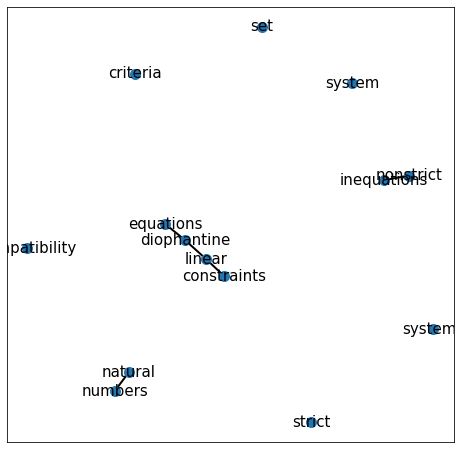

In [39]:
plt.figure(figsize=(8, 8))
G = extractor.graph
pos = nx.spring_layout(G)  # positions for all nodes
# nodes
nx.draw_networkx_nodes(G, pos, node_size=100)

# edges
nx.draw_networkx_edges(G, pos, edgelist=G.edges, width=2)

# labels
nx.draw_networkx_labels(G, pos, font_size=15, font_family="sans-serif");

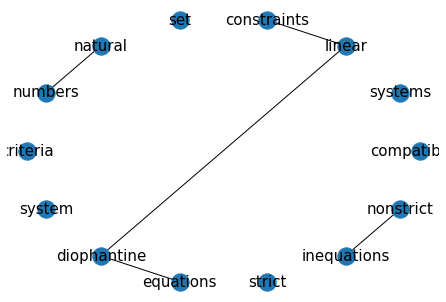

In [46]:
nx.draw_circular(G, with_labels=True, font_size=15)

In [52]:
w = nx.pagerank_scipy(extractor.graph, alpha=0.85, tol=0.0001, weight=None)
top_words = sorted(w, key=w.get, reverse=True)
top_words

['linear',
 'diophantine',
 'natural',
 'numbers',
 'inequations',
 'nonstrict',
 'constraints',
 'equations',
 'compatibility',
 'systems',
 'set',
 'criteria',
 'system',
 'strict']

In [58]:
{k: v for k, v in sorted(w.items(), key=lambda item: item[1], reverse=True)}

{'linear': 0.1458454143787567,
 'diophantine': 0.1458454143787567,
 'natural': 0.11232470502841234,
 'numbers': 0.11232470502841234,
 'inequations': 0.11232470502841234,
 'nonstrict': 0.11232470502841234,
 'constraints': 0.07880399567806791,
 'equations': 0.07880399567806791,
 'compatibility': 0.016900393295450216,
 'systems': 0.016900393295450216,
 'set': 0.016900393295450216,
 'criteria': 0.016900393295450216,
 'system': 0.016900393295450216,
 'strict': 0.016900393295450216}

## 実装理解

In [16]:
w = nx.pagerank_scipy(extractor.graph, alpha=0.85, tol=0.0001, weight=None)
top_words = sorted(w, key=w.get, reverse=True)
top_words

['linear',
 'diophantine',
 'set',
 'natural',
 'numbers',
 'inequations',
 'nonstrict',
 'upper',
 'bounds',
 'minimal',
 'types',
 'mixed',
 'constraints',
 'equations',
 'compatibility',
 'systems',
 'criteria',
 'system',
 'strict',
 'components',
 'solutions',
 'algorithms',
 'construction',
 'sets']

In [9]:
pd.DataFrame(nx.to_numpy_array(extractor.graph))

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [20]:
extractor.sentences[0].pos

['NOUN',
 'ADP',
 'NOUN',
 'ADP',
 'ADJ',
 'NOUN',
 'ADP',
 'DET',
 'NOUN',
 'ADP',
 'ADJ',
 'NOUN',
 'PUNCT']

In [14]:
key = lambda s: s.stems
key(extractor.sentences[0])

['compatibility',
 'of',
 'systems',
 'of',
 'linear',
 'constraints',
 'over',
 'the',
 'set',
 'of',
 'natural',
 'numbers',
 '.']

In [15]:
extractor.sentences[0].stems

['compatibility',
 'of',
 'systems',
 'of',
 'linear',
 'constraints',
 'over',
 'the',
 'set',
 'of',
 'natural',
 'numbers',
 '.']